- env: Python 3.7.4


- dependent packages: `jieba`, `wordcloud`, `pillow`


- Lyndon, Jan. 9, 2020

### tokenization

In [1]:
import os
import jieba
from collections import Counter

In [2]:
# see what's in the corpus file folder
for index, file in enumerate(os.listdir('./corpus/')):
    print(index, file)
# 19thNCCPC is the sample corpus
# userdict is the user defined dictionary, now empty
# stopwords consist of stop words, now empty

0 19thNCCPC.txt
1 userdict.txt
2 stopwords.txt


In [3]:
# load the user dictionary
jieba.load_userdict('./corpus/userdict.txt')

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/_6/73bms9_11733g1hbd2_jmrzc0000gn/T/jieba.cache
Loading model cost 0.955 seconds.
Prefix dict has been built successfully.


In [4]:
# set the stopwords as a list
stopwords = list()
with open('./corpus/stopwords.txt', 'r', encoding='utf-8') as f:
    for sw in f.readlines():
        stopwords.append(sw.strip())
print(stopwords)

[]


In [7]:
# function for tokenization
def tokenize(rawCorpus):
    temp = list()
    with open(rawCorpus, 'r', encoding='utf-8') as f:
        for text in f.readlines():
            words = jieba.cut(text, cut_all=False)
            for word in words:
                if word not in stopwords:
                    temp.append(word.strip())
    tempDict = Counter(temp)
    with open('./corpus/wordFreq.txt', 'w', encoding='utf-8') as t:
        for k, v in dict(sorted(dict(tempDict).items(), key=lambda x: x[1], reverse=True)).items():
            t.write('%s, %d\n'%(k, v))

In [8]:
tokenize('./corpus/19thNCCPC.txt')

### generate word cloud

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [23]:
def genWC(text):
    # you can change the background image as you like
    mask = np.array(Image.open('./imgs/ring.png'))
    font_path = './fonts/msyh.ttf'
    # all parameters are adjustable
    wc = WordCloud(background_color='white', 
                   max_words=200, 
                   mask=mask, 
                   font_path=font_path, 
                   width=600, 
                   height=600, 
                   min_font_size=5, 
                   min_word_length=1, 
                   max_font_size=100, )
    wc.generate(text)
    # save word cloud
    wc.to_file('./imgs/wordCloud.png')
    # show word cloud on screen
    plt.figure(figsize=(20, 15))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

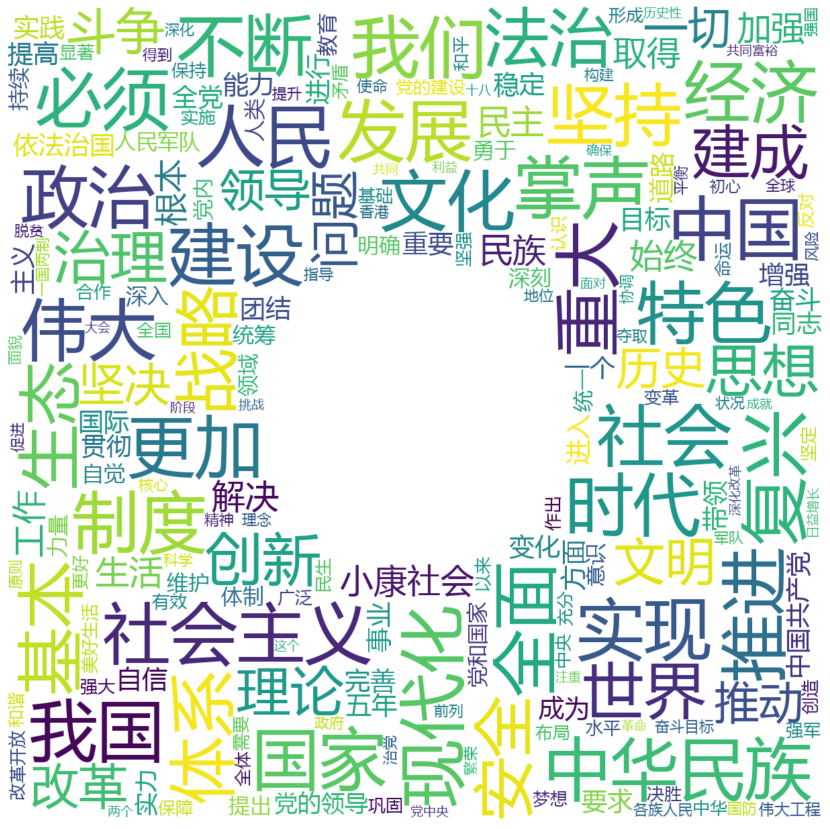

In [24]:
with open('./corpus/wordFreq.txt', 'r', encoding='utf-8') as f:
    genWC(f.read())

### More references
> 1. [click me](https://www.cnblogs.com/lyrichu/p/6151265.html)
>
>
> 2. [click me](https://cloud.tencent.com/developer/article/1373142)
>
>
> 3. [click me](https://www.datacamp.com/community/tutorials/wordcloud-python)